In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
input_file = 'IR readings 1.txt'
output_file = 'IR_readings_1.csv'
output_json = 'IR_readings_1_analysis.json'
analyzed_file = 'IR_readings_1_analysis'

In [3]:
with open(input_file) as f:
    input_data = f.readlines()

In [4]:
input_data_json = {}
curr_height = 'x'
heights = []
for line in input_data:
    line = line.strip()
    if len(line) == 0:
        continue
    if 'Height' in line:
        input_data_json[curr_height] = heights
        curr_height = line.split(' ')[-1]
        heights = []
        continue
    heights.append(line)
input_data_json.pop('x')

[]

In [5]:
input_data_json

{'62': ['2080',
  '2569',
  '2570',
  '2572',
  '2571',
  '2567',
  '2559',
  '2568',
  '2571',
  '2566',
  '2567',
  '2566',
  '2569',
  '2566',
  '2566',
  '2568',
  '2566',
  '2568',
  '2568',
  '2569',
  '2568',
  '2568',
  '2568',
  '2568',
  '2565',
  '2568',
  '2566',
  '2568',
  '2567',
  '2570',
  '2559',
  '2568',
  '2567',
  '2568',
  '2572',
  '2567',
  '2566',
  '2565',
  '2566',
  '2572',
  '2565',
  '2566',
  '2559',
  '2559',
  '2568',
  '2568',
  '2566',
  '2559',
  '2569',
  '2568'],
 '60': ['2082',
  '2567',
  '2567',
  '2567',
  '2570',
  '2569',
  '2572',
  '2566',
  '2568',
  '2568',
  '2567',
  '2572',
  '2568',
  '2569',
  '2568',
  '2567',
  '2572',
  '2565',
  '2568',
  '2566',
  '2567',
  '2576',
  '2559',
  '2568',
  '2568',
  '2568',
  '2568',
  '2566',
  '2567',
  '2567',
  '2566',
  '2569',
  '2564',
  '2568',
  '2568',
  '2568',
  '2571',
  '2567',
  '2565',
  '2568',
  '2568',
  '2567',
  '2566',
  '2566',
  '2568',
  '2566',
  '2568',
  '2565',
  '2568

In [6]:
input_data_arr = []
for height in input_data_json:
    for v in input_data_json[height]:
        input_data_arr.append([height, v])

In [7]:
input_data_df = pd.DataFrame(input_data_arr, columns=['height', 'ir'])
input_data_df.to_csv(output_file, index=False)

In [8]:
analysis_average = {}
analysis_average_arr_height = []
analysis_average_arr_mean = []
analysis_average_arr_median = []
analysis_average_arr_mode = []
analysis_average_arr_var = []
analysis_average_arr_max = []
analysis_average_arr_min = []

for height in input_data_json:
    values = input_data_json[height]
    values = [int(x) for x in values]
    
    mean = np.mean(values)
    median = np.median(values)
    mode = stats.mode(values).mode
    max_v = max(values)
    min_v = min(values)
    var = max(values) - min(values)
    
    analysis_average[height] = {
        'mean': mean,
        'median': median,
        'mode': mode,
        'max': max_v,
        'min': min_v,
        'var': var
    }
    # analysis_average_arr.append([int(height), mean, median, mode])
    analysis_average_arr_height.append(int(height))
    analysis_average_arr_mean.append(mean)
    analysis_average_arr_median.append(median)
    analysis_average_arr_mode.append(mode)
    analysis_average_arr_var.append(var)
    analysis_average_arr_min.append(min_v)
    analysis_average_arr_max.append(max_v)

analysis_average_arr_height = analysis_average_arr_height[::-1]
analysis_average_arr = [
    analysis_average_arr_height,
    analysis_average_arr_mean,
    analysis_average_arr_median,
    analysis_average_arr_mode,
    analysis_average_arr_var,
    analysis_average_arr_min,
    analysis_average_arr_max
]

In [9]:
analysis_average

{'62': {'mean': 2557.18,
  'median': 2568.0,
  'mode': 2568,
  'max': 2572,
  'min': 2080,
  'var': 492},
 '60': {'mean': 2557.74,
  'median': 2568.0,
  'mode': 2568,
  'max': 2576,
  'min': 2082,
  'var': 494},
 '58': {'mean': 2769.92,
  'median': 2782.0,
  'mode': 2784,
  'max': 2787,
  'min': 2170,
  'var': 617},
 '56': {'mean': 2832.58,
  'median': 2842.0,
  'mode': 2841,
  'max': 2848,
  'min': 2366,
  'var': 482},
 '54': {'mean': 2760.4,
  'median': 2766.0,
  'mode': 2768,
  'max': 2772,
  'min': 2480,
  'var': 292},
 '52': {'mean': 2725.2,
  'median': 2730.0,
  'mode': 2730,
  'max': 2736,
  'min': 2484,
  'var': 252},
 '50': {'mean': 2718.38,
  'median': 2724.0,
  'mode': 2724,
  'max': 2728,
  'min': 2476,
  'var': 252},
 '48': {'mean': 2712.24,
  'median': 2717.0,
  'mode': 2717,
  'max': 2722,
  'min': 2469,
  'var': 253},
 '46': {'mean': 2678.14,
  'median': 2683.0,
  'mode': 2684,
  'max': 2690,
  'min': 2442,
  'var': 248},
 '44': {'mean': 2635.2,
  'median': 2645.0,
  'm

In [10]:
for a in analysis_average_arr:
    print(a)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62]
[2557.18, 2557.74, 2769.92, 2832.58, 2760.4, 2725.2, 2718.38, 2712.24, 2678.14, 2635.2, 2600.04, 2567.6, 2531.5, 2500.22, 2469.8, 2439.58, 2425.12, 2409.74, 2392.94, 2385.52, 2799.34, 2758.74, 2368.1, 2371.8, 2360.98, 2358.78, 2369.68, 2355.26, 2365.52, 2341.1, 2332.86]
[2568.0, 2568.0, 2782.0, 2842.0, 2766.0, 2730.0, 2724.0, 2717.0, 2683.0, 2645.0, 2612.5, 2580.0, 2541.0, 2512.0, 2480.0, 2449.0, 2434.0, 2419.0, 2407.0, 2398.0, 2816.0, 2772.0, 2380.0, 2381.0, 2371.0, 2369.0, 2370.0, 2366.0, 2366.0, 2364.0, 2357.5]
[2568, 2568, 2784, 2841, 2768, 2730, 2724, 2717, 2684, 2644, 2612, 2580, 2540, 2512, 2480, 2448, 2434, 2418, 2408, 2398, 2816, 2772, 2380, 2381, 2370, 2370, 2370, 2366, 2365, 2364, 2358]
[492, 494, 617, 482, 292, 252, 252, 253, 248, 517, 649, 640, 490, 614, 489, 477, 475, 477, 618, 620, 844, 685, 622, 484, 499, 498, 7, 512, 8, 1115, 1228]
[2080, 2082, 2170,

In [11]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'mean IR')

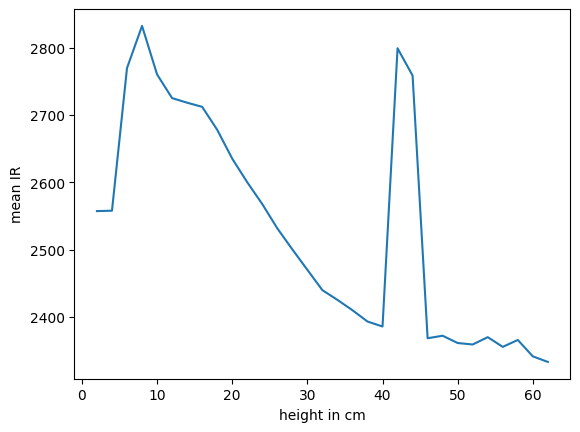

In [12]:
# plot mean
plt.plot(analysis_average_arr[0], analysis_average_arr[1])
plt.xlabel('height in cm')
plt.ylabel('mean IR')

Text(0, 0.5, 'median IR')

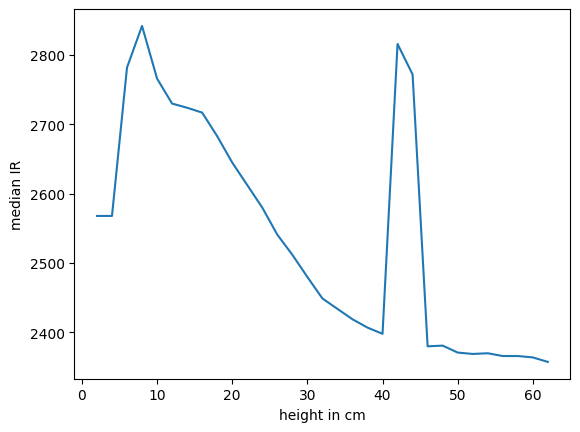

In [13]:
# plot median
plt.plot(analysis_average_arr[0], analysis_average_arr[2])
plt.xlabel('height in cm')
plt.ylabel('median IR')

Text(0, 0.5, 'mode IR')

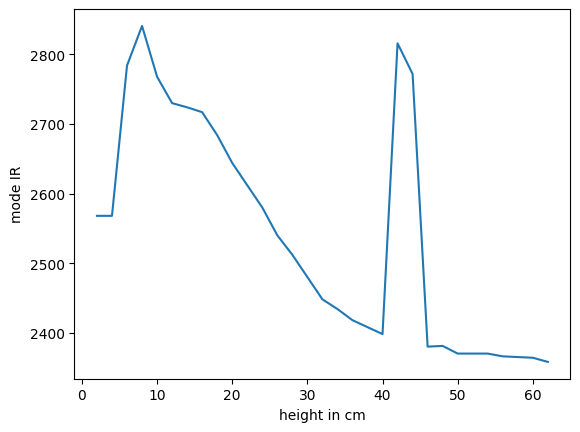

In [14]:
# plot mode
plt.plot(analysis_average_arr[0], analysis_average_arr[3])
plt.xlabel('height in cm')
plt.ylabel('mode IR')

Text(0, 0.5, 'mode & max IR')

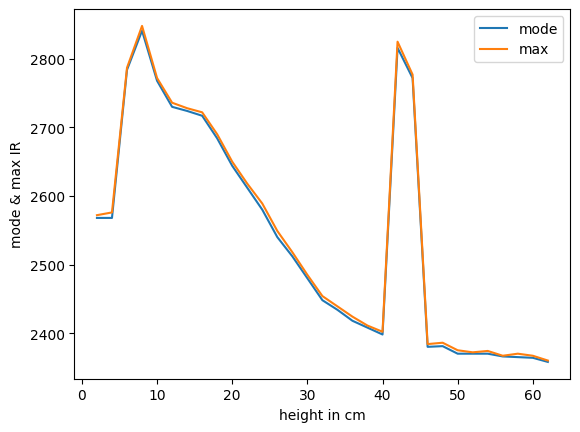

In [18]:
# plot mode and max
plt.plot(analysis_average_arr[0], analysis_average_arr[3])
plt.plot(analysis_average_arr[0], analysis_average_arr[-1])
# plt.plot(analysis_average_arr[0], analysis_average_arr[-2])
plt.legend(['mode', 'max', 'min'])
plt.xlabel('height in cm')
plt.ylabel('mode & max IR')

Text(0, 0.5, 'min IR')

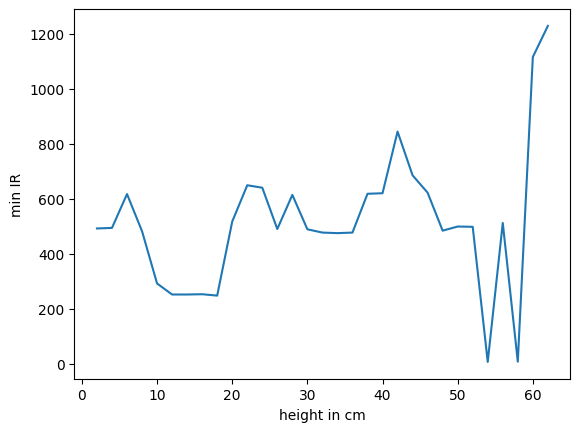

In [17]:
# plot var
plt.plot(analysis_average_arr[0], analysis_average_arr[-3])
plt.xlabel('height in cm')
plt.ylabel('min IR')